<a href="https://colab.research.google.com/github/jvaleros/ML_ClassifyShips/blob/main/SupportVectorMachine/Maxwell_Ramacher_Ships_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import json, itertools, numpy as np, matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [8]:
file = open('/content/shipsnet.json')
ShipsJ = json.load(file)
file.close()

In [9]:
ShipsJ.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [10]:
data = np.array(ShipsJ['data']).astype('uint8')
labels = np.array(ShipsJ['labels']).astype('uint8')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 596)

In [12]:
#SVM
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
#Testing
y_pred = clf.predict(X_test)
print('Accuracy:' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy:0.97125
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       607
           1       0.97      0.91      0.94       193

    accuracy                           0.97       800
   macro avg       0.97      0.95      0.96       800
weighted avg       0.97      0.97      0.97       800



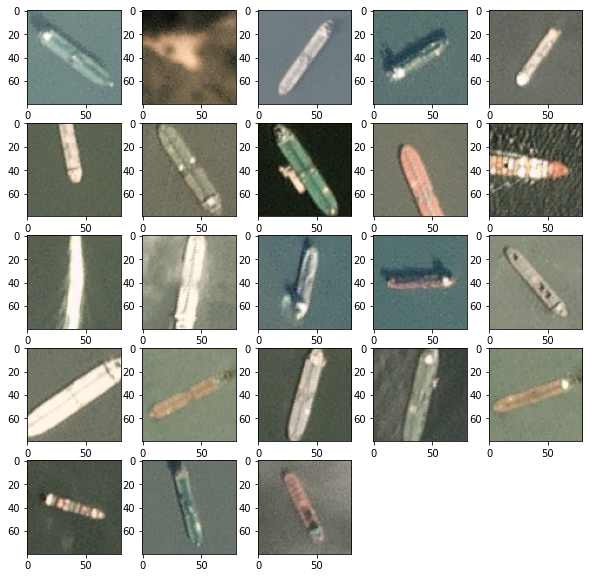

In [52]:
#Lets plot wrong predictions in test set
X_pred_wrong = X_test[y_pred != y_test]

# reshape data for imshow
channels = 3
width = 80
height = 80

X_wrong_shaped = X_pred_wrong.reshape(-1, 3, width, height).transpose([0,2,3,1])

plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(23):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(X_wrong_shaped[i])

plt.show()